In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

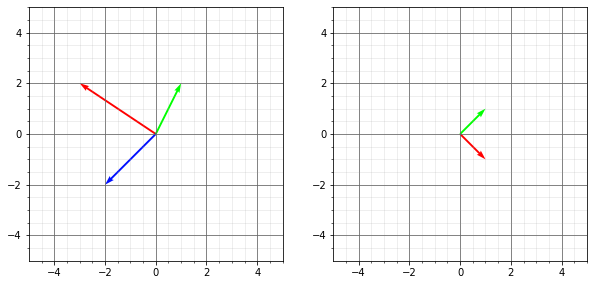

In [2]:
# Function to visualize vectors
def vplot2D(ax, v, colours, xlim=[-5,5], ylim=[-5,5]):
    # append two columns of zeros to the left (represents origin)
    vplot = np.vstack((np.zeros((2,v.shape[1])), v))
    ax.quiver(vplot[0,:], vplot[1,:], vplot[2,:], vplot[3,:], angles='xy', scale_units='xy', scale=1, color=colours)
    
    # Set the limits so arrows are not out of view
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    # Show the major grid lines with dark grey lines
    ax.grid(b=True, which='major', color='#666666', linestyle='-')

    # Show the minor grid lines with very faint and almost transparent grey lines
    ax.minorticks_on()
    ax.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    ax.set_aspect(1)

# Testing the plotting function
# Set 2x1 figure    
fig, ax = plt.subplots(1,2, figsize=(10,10))

v1 = np.array([[-3, 1, -2],
               [2, 2, -2]])
v2 = np.array([[1, 1], 
               [-1, 1]])
cols = ['#FF0000', '#00FF00', "#000FFF"]

vplot2D(ax[0], v1, colours=cols)
vplot2D(ax[1], v2, colours=cols)

### Principle Component Analysis (PCA) is a method of dimensionality reduction to minimize redundancy of an overdetermined system. We aim to choose a new orthogonal coordinate system defined by eigenvectors such that you yield the greatest variability in your data. 

### Suppose you have an overdetermined system.

$X = \begin{bmatrix}
           x_{1} & y_{1} \\
           x_{2} & y_{2} \\
           ...  & ... \\
           x_{n} & y_{n}
\end{bmatrix} $

Data generation below inspired from: https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.12-Example-Principal-Components-Analysis/

In [3]:
# Generate 50 random x values from (0, 20)
x = 20*np.random.rand(200)
# Generate 50 random y values directly proportional to x
y = x + 2*np.random.randn(200)+1

# Reshape to column vectors
x = x.reshape(200, 1)
y = y.reshape(200, 1)

# Stack horizontally to 50x2 so we can plot
X = np.hstack([x, y])
X[:5]

array([[ 6.906316  ,  8.61372583],
       [ 6.83698597,  6.91405835],
       [11.01996593,  9.87597924],
       [17.83605471, 15.52338284],
       [ 2.37221024, -0.65698906]])

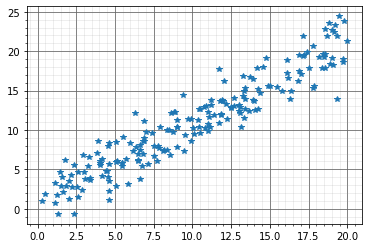

In [4]:
plt.plot(X[:,0], X[:,1], '*')

# Show the grid
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.show()

### We can see that the x and y values are loosely in the same range, this means center the data around the origin by subtracting the mean ($X-\bar{X}$). If our data is ranged differently, then we should perform feature scaling to get it between 0 and 1. 


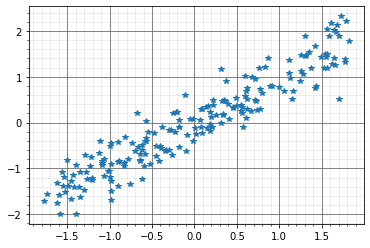

In [5]:
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

plt.plot(X[:,0], X[:,1], '*')

# Show the grid
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.show()

### We know that variance is a single-value measure of the spread of data. Covariance allows us to see how the directions of two vectors differ from each other. $C_{X}=\dfrac{1}{n-1}X^{T}X$. Orthogonal vectors are indicated by a 0 covariance, which means that they are statistically independent. 

### Note the following: 
- The values along the main diagonal ($C_{i,j}$ where $i=j$) measure variance 
- Non-diagonals are symmetric $C_{i,j} = C_{j,i}$ and measure covariance
- Smaller values indicate that vectors are more statistically independent
- Higher values indicate that vectors are more statistically dependent, and thus redundant

$$Cov(X) = 
\begin{bmatrix}
    \sigma^{2}_{x_{1},x_{1}} & \sigma^{2}_{x_{1},y_{1}} & \sigma^{2}_{x_{1},x_{2}} & ... & \sigma^{2}_{x_{1},y_{3}} \\
    \sigma^{2}_{y_{1},x_{1}} & \sigma^{2}_{y_{1},y_{1}} & \sigma^{2}_{y_{1},x_{2}} & ... & \sigma^{2}_{y_{1},y_{3}} \\
    \sigma^{2}_{x_{2},x_{1}} & \sigma^{2}_{x_{2},y_{1}} & \sigma^{2}_{x_{2},x_{2}} & ... & \sigma^{2}_{x_{2},y_{3}} \\
    \vdots                   & \vdots                   & \vdots                   & \ddots & \vdots \\
    \sigma^{2}_{y_{3},x_{1}} & \sigma^{2}_{y_{3},y_{1}} & \sigma^{2}_{y_{3},x_{2}} & ... & \sigma^{2}_{y_{3},y_{3}} \\
\end{bmatrix}
$$

### Our goal is to diagonalize the covariance matrix to remove redundancies. We can use Eigendecomposition or SVD.

In [6]:
cov_X = (X.T@X)/(X.shape[0])

cov_X

array([[1.        , 0.94338757],
       [0.94338757, 1.        ]])

In [7]:
eig_vals, eig_vecs = np.linalg.eig(cov_X)

idx = eig_vals.argsort()[::-1]   
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:,idx]

In [8]:
eig_vecs

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [9]:
eig_vals

array([1.94338757, 0.05661243])

### Here we visualize our eigenvectors superposed on our data. Notice that the largest eigenvector (red) points in the direction of the largest variance. This is called the first pricipal component.

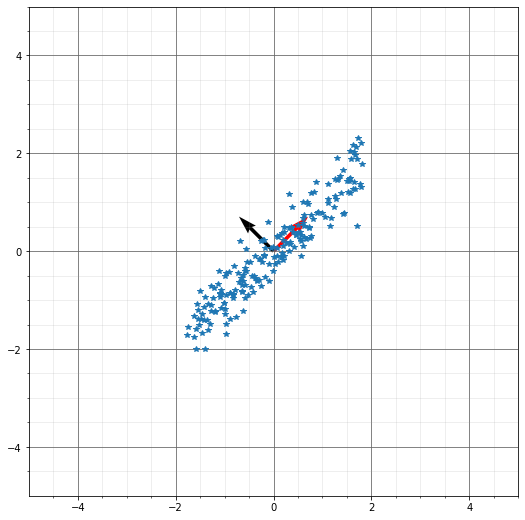

In [10]:
fig, ax = plt.subplots(1, figsize=(9,9))

cols = ['#FF0000', '#000000']

vplot2D(ax, eig_vecs, colours=cols)
ax.plot(X[:,0], X[:,1], '*')

plt.show()

### Multipying by the eigenvector matrix transforms our coordinate system.

$$X_{new} = 
\begin{bmatrix}
    x_{1} & y_{1} \\
    x_{2} & y_{2} \\
    ... & ... \\  
    x_{n} & y_{n}
\end{bmatrix}
\begin{bmatrix}
    eig_{1,x} & eig_{1,y} \\
    eig_{2,x} & eig_{2,y} 
\end{bmatrix}$$

In [31]:
X_new = X@eig_vecs
X_new.shape

(200, 2)

### When we multiply the eigenvectors by themselves, we are transforming them in the same way as our data

In [22]:
eig_new = eig_vecs.T@eig_vecs
eig_new # Here we can see the entries off the diagonal are negligible

array([[1.00000000e+00, 2.23711432e-17],
       [2.23711432e-17, 1.00000000e+00]])

### Finally we can visualize our transformed data and eigenvectors

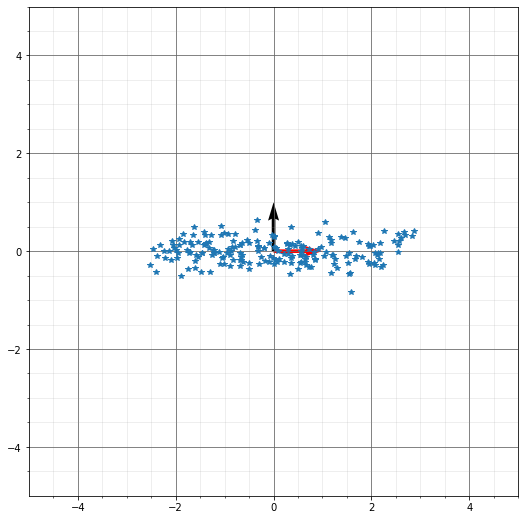

In [23]:
fig, ax = plt.subplots(1, figsize=(9,9))

cols = ['#FF0000', '#000000']

vplot2D(ax, eig_new, colours=cols)
ax.plot(X_new[:,0], X_new[:,1], '*')

plt.show()

### We can go back to the original by multiplying by the eigenvectors

In [36]:
eig_old = eig_new@eig_vecs.T
eig_old # Here we can see the entries off the diagonal are negligible

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [40]:
X_old = X_new@eig_vecs.T
X_old.shape

(200, 2)

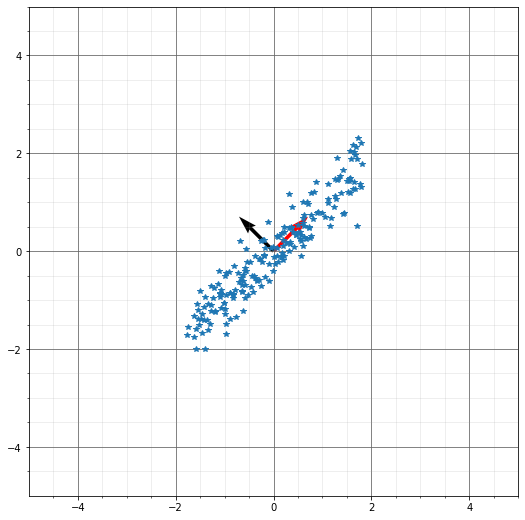

In [41]:
fig, ax = plt.subplots(1, figsize=(9,9))

cols = ['#FF0000', '#000000']

vplot2D(ax, eig_old, colours=cols)
ax.plot(X_old[:,0], X_old[:,1], '*')

plt.show()